In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

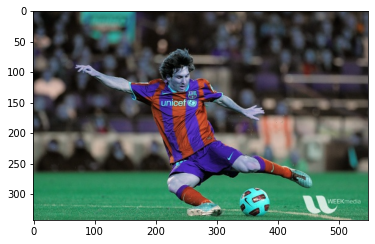

In [5]:
img=cv2.imread("messi5.jpg")
plt.imshow(img)

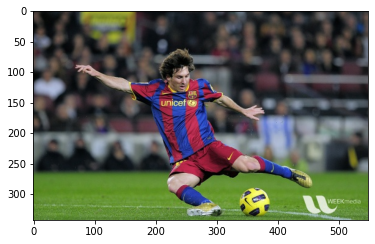

In [6]:
new_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(new_img)

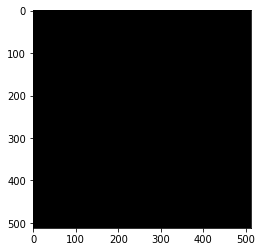

In [7]:
image_blank=np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(image_blank)

In [10]:
image_blank=np.zeros(shape=(512,512,3),dtype=np.uint8)
def click_event(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:
        strXY=str(x)+","+str(y)
        cv2.putText(image_blank,strXY,(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(255,255,0),2)
        cv2.imshow('Coordinate Image',new_img)
        
cv2.imshow('Coordinate Image',new_img)
cv2.setMouseCallback('Coordinate Image',click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

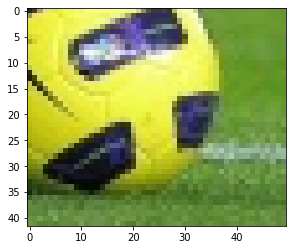

In [15]:
roi=new_img[300:400,350:400]
plt.imshow(roi)

In [20]:
output = cv2.addWeighted(new_img, 0.5, roi, 0.5, 0.5)
cv2_imshow(final)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


In [25]:
background = cv2.flip(new_img,1)
added_image = cv2.addWeighted(background[150:250,150:250,:],roi,roi[0:100,0:100,:],1-roi,0)

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'addWeighted'
> Overload resolution failed:
>  - Argument 'alpha' can not be treated as a double
>  - Argument 'alpha' can not be treated as a double


In [28]:
import cv2
import numpy as np
 
# create an overlay image. You can use any image
foreground = np.ones((100,100,3),dtype='uint8')*255
# Open the camera
cap = cv2.VideoCapture(0)
# Set initial value of weights
alpha = 0.4
while True:
    # read the background
    ret, background = cap.read()
    background = cv2.flip(background,1)
    # Select the region in the background where we want to add the image and add the images using cv2.addWeighted()
    added_image = cv2.addWeighted(background[150:250,150:250,:],alpha,foreground[0:100,0:100,:],1-alpha,0)
    # Change the region with the result
    background[150:250,150:250] = added_image
    # For displaying current value of alpha(weights)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(background,'alpha:{}'.format(alpha),(10,30), font, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.imshow('a',background)
    k = cv2.waitKey(10)
    # Press q to break
    if k == ord('q'):
        break
    # press a to increase alpha by 0.1
    if k == ord('a'):
        alpha +=0.1
        if alpha >=1.0:
            alpha = 1.0
    # press d to decrease alpha by 0.1
    elif k== ord('d'):
        alpha -= 0.1
        if alpha <=0.0:
            alpha = 0.0
# Release the camera and destroy all windows         
cap.release()
cv2.destroyAllWindows()